In [1]:
from ipynb.fs.full.data_cleaning import df, serviceDf, zipCodes
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
16146,Home Improvement,Furniture Assembly,Peripheral,Furniture Resolution,9.00,NaN,,5.00,77002,Houston,Texas,TX,NaN
30908,Home Improvement,Real Estate Appraisal,Peripheral,Ledztart Inspections,41.00,375.00,,4.50,94108,San Francisco,California,CA,"15,375.00"
68786,Lessons,Private Self Defense Lessons,Main,Evolve Fitness by Scott Meade,16.00,80.00,session,5.00,95112,San Jose,California,CA,"1,280.00"


In [2]:
df.shape

(31696, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,22471,0.71
1,Events,3444,0.11
5,Wellness,2683,0.08
3,Lessons,1405,0.04
0,Business,1237,0.04
4,Pets,456,0.01


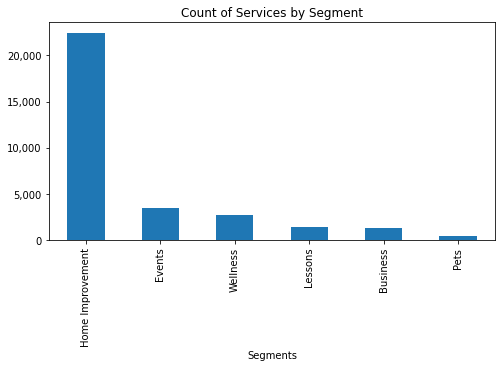

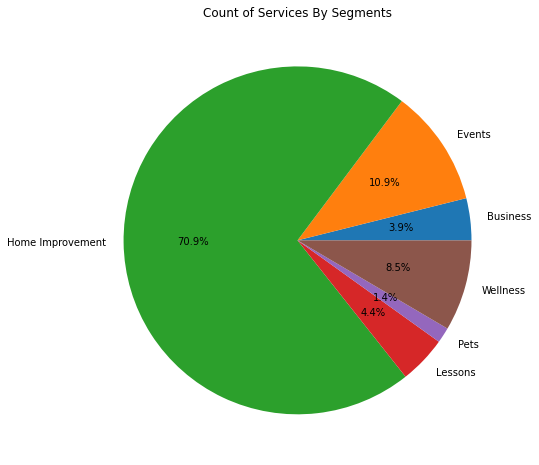

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount = pd.merge(
    dfServicesCount, serviceDf[["Services", "Segments"]], on="Services"
)
dfServicesCount = dfServicesCount[["Segments", "Services", "Count", "Contribution"]]
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Segments,Services,Count,Contribution
278,Events,Wedding Officiant,822,0.03
1,Business,Accounting,789,0.02
198,Home Improvement,Real Estate Agent Services,759,0.02
35,Home Improvement,Commercial Cleaning,725,0.02
280,Events,Wedding and Event Makeup,688,0.02
46,Events,DJ,683,0.02
150,Wellness,Massage Therapy,585,0.02
3,Wellness,Alternative Healing,560,0.02
133,Home Improvement,Interior Design,527,0.02
187,Home Improvement,Pressure Washing,505,0.02


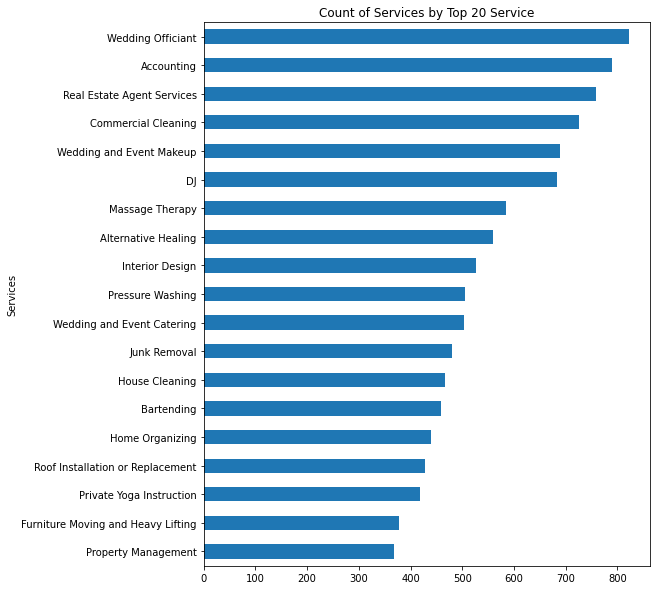

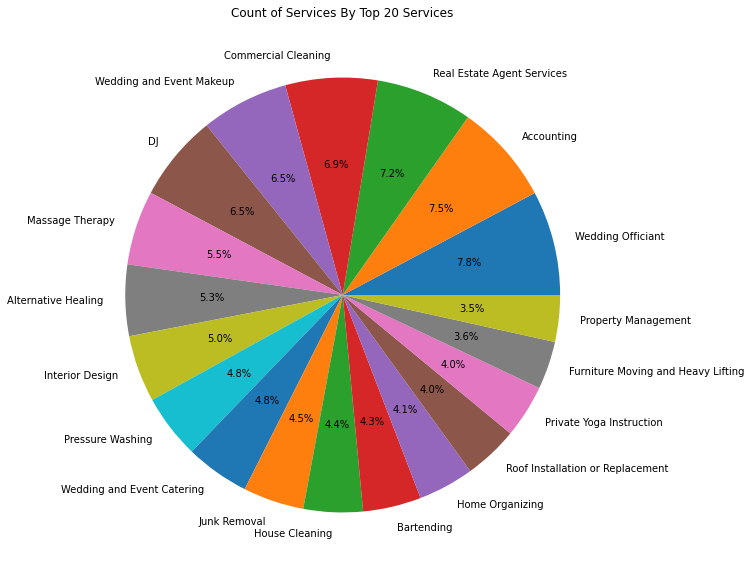

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

## Counts of Services by Zip Code

In [7]:
serviceCountZip = df.groupby("Zip Code")["Segments"].count()
dfServiceCountZip = serviceCountZip.to_frame(name="Count").reset_index()

dfServiceCountZip["Zip Code"] = dfServiceCountZip["Zip Code"].astype(str)
zipCodes["Representative ZIP Code"] = zipCodes["Representative ZIP Code"].astype(str)

dfServiceCountZip = pd.merge(
    dfServiceCountZip,
    zipCodes[["Capital City", "State", "Representative ZIP Code"]],
    left_on="Zip Code",
    right_on="Representative ZIP Code",
    how="left",
).drop("Representative ZIP Code", axis=1)

dfServiceCountZip["Contribution"] = (
    dfServiceCountZip["Count"] / dfServiceCountZip["Count"].sum()
)

dfServiceCountZip = dfServiceCountZip[
    ["State", "Capital City", "Zip Code", "Count", "Contribution"]
]
dfServiceCountZip.sort_values(by="Count", ascending=False)[:20]

,State,Capital City,Zip Code,Count,Contribution
18,Georgia,Atlanta,30303,1237,0.04
79,California,Los Angeles,90013,1175,0.04
65,Texas,Dallas,75207,1102,0.03
23,Florida,Miami,33132,1030,0.03
66,Texas,Houston,77002,1024,0.03
69,Colorado,Denver,80202,972,0.03
73,Arizona,Phoenix,85001,866,0.03
24,Florida,Tampa,33602,828,0.03
80,California,San Diego,92101,819,0.03
50,Illinois,Chicago,60176,773,0.02


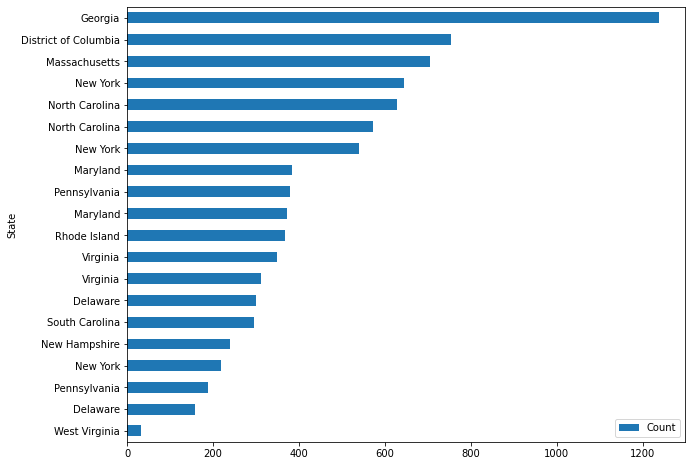

In [8]:
dfServiceCountZip[["State", "Count"]][:20].sort_values(
    by="Count", ascending=True
).plot.barh(x="State", y="Count", figsize=(10,8))
plt.show()

## Zip Code with Highest Count of Events, Wellness, and Lessons

In [32]:
dfLifeStyle.columns

Index(['Segments', 'Services', 'Type', 'Service', 'Hires', 'Price',
       'Price Type', 'Rating', 'Zip Code', 'Capital City', 'State',
       'Abbreviation', 'Implied Revenue'],
      dtype='object')

In [45]:
sliceSegments = ["Lessons", "Wellness", "Events"]
dfLifeStyle = df[df["Segments"].isin(sliceSegments)]

dfLifeStyleCountByZipChart = dfLifeStyle.groupby("Capital City")["Segments"].count().sort_values(ascending=False)

dfLifeStyleCountByZip = dfLifeStyleCountByZipChart.to_frame(
    name="Lifestyle Services"
).reset_index()

dfLifeStyleCountByZip["Contribution"] = (
    dfLifeStyleCountByZip["Lifestyle Services"]
    / dfLifeStyleCountByZip["Lifestyle Services"].sum()
)

dfLifeStyleCountByZip.sort_values(by="Lifestyle Services", ascending=False)[:20]

,Capital City,Lifestyle Services,Contribution
48,Los Angeles,330,0.04
51,Miami,295,0.04
4,Atlanta,277,0.04
74,San Diego,226,0.03
64,Phoenix,214,0.03
24,Dallas,212,0.03
36,Houston,207,0.03
25,Denver,207,0.03
75,San Francisco,201,0.03
83,Tampa,198,0.03


In [49]:
dfLifeStyleCountByZipChart.sort_values(ascending=False)

Capital City
Los Angeles    330
Miami          295
Atlanta        277
San Diego      226
Phoenix        214
              ... 
Augusta          4
Fargo            3
Pierre           2
Anchorage        2
Juneau           1
Name: Segments, Length: 90, dtype: int64

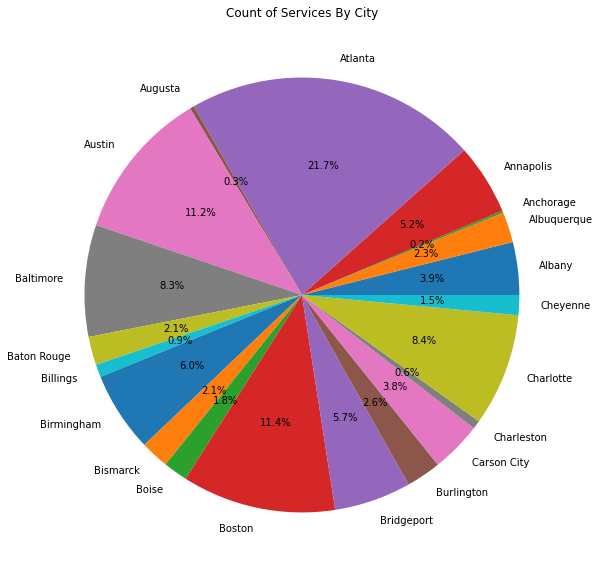

In [46]:
dfLifeStyleCountByZipChart[:20].plot.pie(
    autopct="%.1f%%",
    title="Count of Services By City",
    x="Capital City",
    xlabel="",
    y="Lifestyle Services",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Which segments are doing better or worse?

Maybe see implied revenue from these segments

In [9]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [10]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
2,Home Improvement,"54,980,041.00",0.63
1,Events,"21,587,103.00",0.25
5,Wellness,"5,032,072.00",0.06
0,Business,"4,044,998.00",0.05
3,Lessons,"1,856,455.00",0.02
4,Pets,"282,560.00",0.00


In [11]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
278,Wedding Officiant,"8,895,880.00",0.10
46,DJ,"5,587,260.00",0.06
88,Furniture Moving and Heavy Lifting,"4,883,556.00",0.06
172,Photo Booth Rental,"3,617,129.00",0.04
249,TV Mounting,"2,948,217.00",0.03
135,Junk Removal,"2,484,588.00",0.03
144,Local Moving (under 50 miles),"2,209,347.00",0.03
35,Commercial Cleaning,"2,030,048.00",0.02
150,Massage Therapy,"1,796,095.00",0.02


In [12]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"11,979,342.00",0.14
43,Texas,"11,695,914.00",0.13
9,Florida,"4,862,629.00",0.06
32,New York,"4,390,947.00",0.05
10,Georgia,"3,581,862.00",0.04
8,District of Columbia,"3,572,030.00",0.04
30,New Jersey,"3,383,597.00",0.04
13,Illinois,"2,977,643.00",0.03
33,North Carolina,"2,947,402.00",0.03


# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [13]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"916,586.00",0.78
1,Events,"128,781.00",0.11
5,Wellness,"54,117.00",0.05
0,Business,"36,744.00",0.03
3,Lessons,"29,576.00",0.03
4,Pets,"11,379.00",0.01


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [14]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
2,Home Improvement,22471,"916,586.00",40.79
1,Events,3444,"128,781.00",37.39
0,Business,1237,"36,744.00",29.70
4,Pets,456,"11,379.00",24.95
3,Lessons,1405,"29,576.00",21.05
5,Wellness,2683,"54,117.00",20.17


## Hires by Services

Look at the top 20.

In [15]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

#### Top 20 Hires Count

In [16]:
dfHiresCountServices.sort_values(by="Segments", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
168,Personal Training,"7,220.00",0.01,Wellness
192,Private Yoga Instruction,"3,402.00",0.00,Wellness
67,Facial Treatments,968.00,0.00,Wellness
165,Palm Reading,"1,858.00",0.00,Wellness
157,Nutritionist,"2,389.00",0.00,Wellness
12,Astrology Reading,583.00,0.00,Wellness
110,Health and Wellness Coaching,"4,237.00",0.00,Wellness
173,Physical Therapy,767.00,0.00,Wellness
130,Hypnotherapy,"1,705.00",0.00,Wellness
148,Marriage and Relationship Counseling,"2,269.00",0.00,Wellness


#### Bottom 20 Hires Count

In [17]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[-19:]

,Services,Total Hires,Contribution,Segments
21,Cabinet Refinishing and Repair,450.00,0.00,Home Improvement
166,Patio Cover and Awning Services,448.00,0.00,Home Improvement
136,Kitchen Remodel,440.00,0.00,Home Improvement
40,Construction Services,440.00,0.00,Home Improvement
2,Air Quality and Environmental Testing,434.00,0.00,Home Improvement
218,Siding Installation,423.00,0.00,Home Improvement
282,Well System Work,383.00,0.00,Home Improvement
215,Shower and Bathtub Installation or Replacement,378.00,0.00,Home Improvement
271,Water Feature Installation,356.00,0.00,Home Improvement
233,Sound Proofing,336.00,0.00,Home Improvement


### The Hires Ratio

In [18]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

#### Top 20 Hires Ratio

In [19]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
175,Piano Moving,45,"10,371.00",230.47,Home Improvement
88,Furniture Moving and Heavy Lifting,377,"53,060.00",140.74,Home Improvement
183,Pool Table Moving,30,"4,176.00",139.20,Home Improvement
5,Appliance Repair or Maintenance,83,"10,550.00",127.11,Home Improvement
264,Upholstery and Furniture Cleaning,71,"8,738.00",123.07,Home Improvement
26,Carpet Repair or Partial Replacement,43,"5,193.00",120.77,Home Improvement
100,Gazebo Installation and Construction,37,"4,423.00",119.54,Home Improvement
147,Long Distance Moving,93,"10,918.00",117.40,Home Improvement
176,Picture Hanging and Art Installation,103,"11,680.00",113.40,Home Improvement
224,Sink or Faucet Repair,22,"2,375.00",107.95,Home Improvement


#### Bottom 20 Hires Ratio

In [20]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[-19:]

,Services,Count,Total Hires,Hire Ratio,Segments
173,Physical Therapy,87,767.00,8.82,Wellness
120,Home Staging,186,"1,623.00",8.73,Home Improvement
209,Saxophone Lessons,105,896.00,8.53,Lessons
2,Air Quality and Environmental Testing,51,434.00,8.51,Home Improvement
133,Interior Design,527,"4,452.00",8.45,Home Improvement
192,Private Yoga Instruction,418,"3,402.00",8.14,Wellness
193,Property Management,367,"2,856.00",7.78,Home Improvement
136,Kitchen Remodel,57,440.00,7.72,Home Improvement
189,Private Self Defense Lessons,213,"1,506.00",7.07,Lessons
67,Facial Treatments,138,968.00,7.01,Wellness


### Scatter of Count and Number of Hires

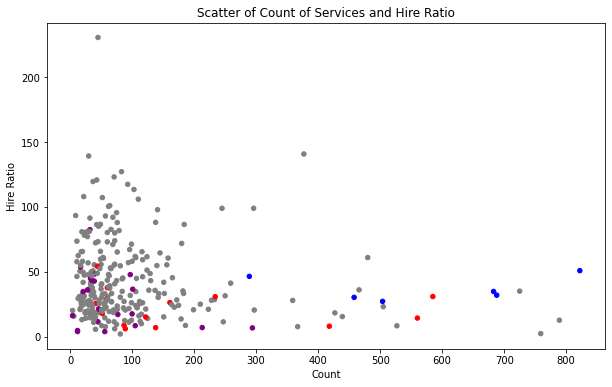

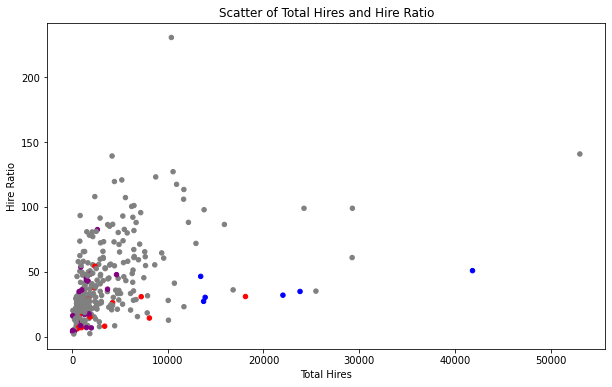

In [21]:
colors = {
    "Home Improvement": "gray",
    "Business": "gray",
    "Pets": "gray",
    "Events": "blue",
    "Wellness": "red",
    "Lessons": "purple",
}

dfCountMergeServices.plot.scatter(
    title="Scatter of Count of Services and Hire Ratio",
    x="Count",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

dfCountMergeServices.plot.scatter(
    title="Scatter of Total Hires and Hire Ratio",
    x="Total Hires",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

From the first scatterplot, it could mean that services with a higher count could mean that there is no clear indication of specialization. It could be that:
- There are too many services for customers to choose from, confusing them
- There are just a lot of competitors, so the sellers would have to share more

# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Top 10 Weight

In [22]:
hiresTopN = (
    df.groupby("Services")["Hires"]
    .nlargest(10)
    .sum(level=0)
    .to_frame(name="Top Hires")
    .reset_index()
)

hireSkew = (
    df.groupby("Services")["Hires"].skew().to_frame(name="Skewness").reset_index()
)

dfHiresSkew = pd.merge(
    dfHiresCountServices[["Services", "Total Hires", "Segments"]],
    hiresTopN,
    on="Services",
)

dfHiresSkew = pd.merge(
    dfHiresSkew, dfServicesCount[["Services", "Count"]], on="Services"
)

dfHiresSkew = pd.merge(dfHiresSkew, hireSkew, on="Services")

dfHiresSkew["Top Weight"] = dfHiresSkew["Top Hires"] / dfHiresSkew["Total Hires"]
dfHiresSkew = dfHiresSkew[
    [
        "Segments",
        "Services",
        "Count",
        "Top Hires",
        "Total Hires",
        "Top Weight",
        "Skewness",
    ]
]
dfHiresSkew[
    (dfHiresSkew["Count"] > 100)
    & (
        (dfHiresSkew["Segments"] == "Events")
        | (dfHiresSkew["Segments"] == "Lessons")
        | (dfHiresSkew["Segments"] == "Wellness")
    )
].sort_values(by="Top Weight", ascending=False)[:20]

,Segments,Services,Count,Top Hires,Total Hires,Top Weight,Skewness
67,Wellness,Facial Treatments,138,599.00,968.00,0.62,3.09
165,Wellness,Palm Reading,122,"1,113.00","1,858.00",0.60,4.94
209,Lessons,Saxophone Lessons,105,520.00,896.00,0.58,2.28
110,Wellness,Health and Wellness Coaching,161,"2,117.00","4,237.00",0.50,4.39
189,Lessons,Private Self Defense Lessons,213,657.00,"1,506.00",0.44,5.39
174,Lessons,Piano Lessons,101,"1,542.00","3,701.00",0.42,2.14
192,Wellness,Private Yoga Instruction,418,"1,411.00","3,402.00",0.41,9.40
168,Wellness,Personal Training,234,"2,763.00","7,220.00",0.38,5.56
172,Events,Photo Booth Rental,289,"4,668.00","13,439.00",0.35,4.21
265,Lessons,Violin Lessons,294,521.00,"2,009.00",0.26,2.90


In [23]:
df[df["Services"] == "Saxophone Lessons"].sort_values(
    by="Hires", ascending=False
)[:10]

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
1494,Lessons,Saxophone Lessons,Peripheral,Nashville Music Academy,90.00,60.00,hour,5.00,37219,Nashville,Tennessee,TN,"5,400.00"
30446,Lessons,Saxophone Lessons,Peripheral,Musik Mogul,84.00,50.00,hour,5.00,33132,Miami,Florida,FL,"4,200.00"
17586,Lessons,Saxophone Lessons,Peripheral,Continuo Piano Tuning,76.00,80.00,hour,5.00,11021,Great Neck (NYC Suburb),New York,NY,"6,080.00"
124136,Lessons,Saxophone Lessons,Peripheral,Music Academy of Kansas City,63.00,59.00,hour,5.00,64105,Kansas City,Missouri,MO,"3,717.00"
62561,Lessons,Saxophone Lessons,Peripheral,Thomas Kresge Music,48.00,60.00,hour,5.00,10007,New York City,New York,NY,"2,880.00"
62558,Lessons,Saxophone Lessons,Peripheral,Joshua Shneider Music/NYC,38.00,70.00,hour,5.00,10007,New York City,New York,NY,"2,660.00"
49356,Lessons,Saxophone Lessons,Peripheral,Conservatory at Home Denver,33.00,59.00,hour,4.50,80202,Denver,Colorado,CO,"1,947.00"
89529,Lessons,Saxophone Lessons,Peripheral,Andrew Dixon Music Education/Performance,30.00,60.00,hour,5.00,94108,San Francisco,California,CA,"1,800.00"
1493,Lessons,Saxophone Lessons,Peripheral,DPV Music Lessons,29.00,79.00,hour,5.00,37219,Nashville,Tennessee,TN,"2,291.00"
18220,Lessons,Saxophone Lessons,Peripheral,GTRx - Play your favorite songs!,29.00,50.00,hour,5.00,28105,Charlotte,North Carolina,NC,"1,450.00"
